[Back to the main menu](../README.md)</p>
[Back to the menu of chapter 01](./README.md)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span></li><li><span><a href="#Pixels-:-an-image-as-a-table-of-numbers" data-toc-modified-id="Pixels-:-an-image-as-a-table-of-numbers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pixels : an image as a table of numbers</a></span></li><li><span><a href="#Image-size-:-physical,-DPI,-interpolation-and-scaling" data-toc-modified-id="Image-size-:-physical,-DPI,-interpolation-and-scaling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image size : physical, DPI, interpolation and scaling</a></span><ul class="toc-item"><li><span><a href="#Physical-size" data-toc-modified-id="Physical-size-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Physical size</a></span></li><li><span><a href="#Interpolation" data-toc-modified-id="Interpolation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Interpolation</a></span></li><li><span><a href="#DPI" data-toc-modified-id="DPI-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DPI</a></span><ul class="toc-item"><li><span><a href="#[Optional]-What-it-means-in-Python-terms-:" data-toc-modified-id="[Optional]-What-it-means-in-Python-terms-:-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>[Optional] What it means in Python terms :</a></span></li><li><span><a href="#Illustration-:-a-figure's-size-when-set-to-be-printed-on-a-100-dpi-paper" data-toc-modified-id="Illustration-:-a-figure's-size-when-set-to-be-printed-on-a-100-dpi-paper-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Illustration : a figure's size when set to be printed on a 100 dpi paper</a></span></li><li><span><a href="#Illustration-:-the-same-figure's-size-when-set-to-be-printed-on-a-200-dpi-paper." data-toc-modified-id="Illustration-:-the-same-figure's-size-when-set-to-be-printed-on-a-200-dpi-paper.-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Illustration : the same figure's size when set to be printed on a 200 dpi paper.</a></span></li><li><span><a href="#Simulation-of-several-printing-situations" data-toc-modified-id="Simulation-of-several-printing-situations-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Simulation of several printing situations</a></span></li></ul></li></ul></li><li><span><a href="#Colors-in-a-mono-channel-digital-image-and-LUTs" data-toc-modified-id="Colors-in-a-mono-channel-digital-image-and-LUTs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Colors in a mono channel digital image and LUTs</a></span></li><li><span><a href="#Bit-Depth" data-toc-modified-id="Bit-Depth-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bit Depth</a></span></li></ul></div>

```
Author : Yannick Krempp
Cellular Imaging Facility
28.05.2020
```

# Pixels, size, colors, and values

## Preamble

To discover how a digital image is built and understood by a computer, there are a few notions you need to understand: **What are pixels, what is a digital image size and dimension, what about its color ?**

These notions are explored below.

> *Important note : You will see Python code. You can ignore the code parts if you're not familiar with, and come back later on to see how the figures and interactive views were generated*.

## Pixels : an image as a table of numbers

A digital image is just a table of numbers or a set of tables in the case of mutliple channels that represent the pixels and their respective intensities.

To illustrate this concept, we can fill a table with random values of 0 and 1 and display it as an image, and compare it to an actual image:

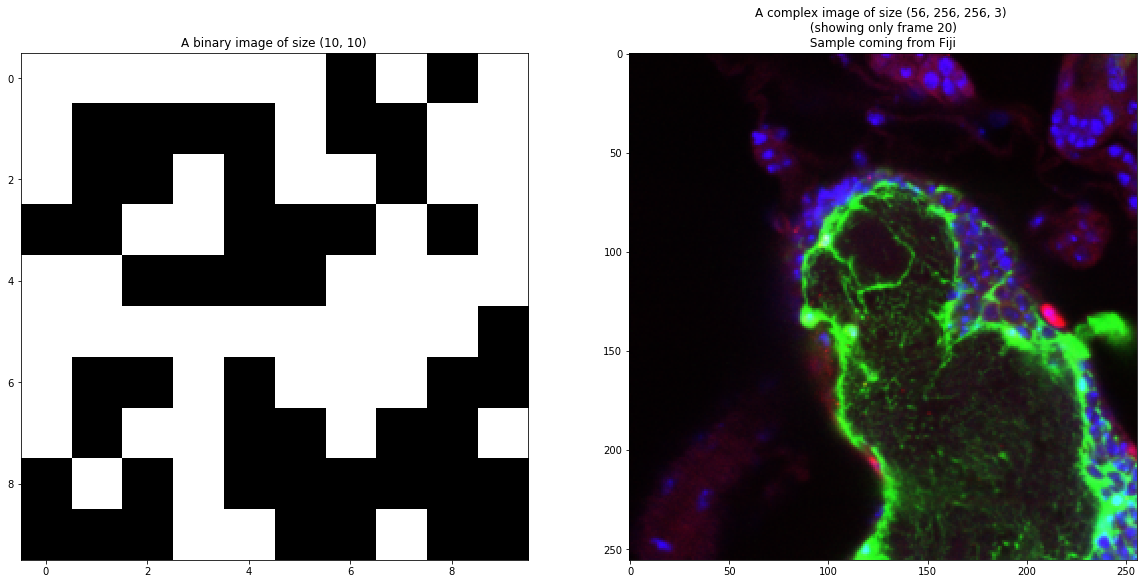

In [1]:
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import random

random.seed()
df = pd.DataFrame(np.random.randint(0,2,size=(10, 10)))
big_image = io.imread('images/first-instar-brain.tif') 

fig, ax = plt.subplots(figsize=(20,10), ncols=2)

ax[0].imshow(df, cmap='gray')
ax[0].set_title(f"A binary image of size {df.shape}")

ax[1].imshow(big_image[20,:,:,:], cmap='gray')
ax[1].set_title(f"A complex image of size {big_image.shape} \n (showing only frame 20) \n Sample coming from Fiji ");

The right image is a sample from Fiji with 3 channels and 56 slices.

**We can display some of their values to understand how they are encoded:**

In [2]:
print('Binary image: \n\n', df.head(100),'\n')
print('Big image: \n\n', big_image[20,:,:,:]);

Binary image: 

    0  1  2  3  4  5  6  7  8  9
0  1  1  1  1  1  1  0  1  0  1
1  1  0  0  0  0  1  0  0  1  1
2  1  0  0  1  0  1  1  0  1  1
3  0  0  1  1  0  0  0  1  0  1
4  1  1  0  0  0  0  1  1  1  1
5  1  1  1  1  1  1  1  1  1  0
6  1  0  0  1  0  1  1  1  0  0
7  1  0  1  1  0  0  1  0  0  1
8  0  1  0  1  0  0  0  0  0  0
9  0  0  0  1  1  0  0  1  0  0 

Big image: 

 [[[  4   1   2]
  [  4   1   2]
  [  5   1   2]
  ...
  [ 58  68  36]
  [ 60  68  35]
  [ 45  41  26]]

 [[  4   1   2]
  [  4   1   2]
  [  6   1   3]
  ...
  [ 60  65  33]
  [ 62  69  32]
  [ 54  42  27]]

 [[  4   1   2]
  [  4   1   2]
  [  5   1   2]
  ...
  [ 67  54  32]
  [ 61  56  30]
  [ 57  29  25]]

 ...

 [[  8   0   7]
  [ 10   1   6]
  [ 11   1   9]
  ...
  [ 60 144 138]
  [ 62 154 184]
  [ 71 169 164]]

 [[  6   0   5]
  [  8   0   5]
  [ 12   0   6]
  ...
  [ 59 105 176]
  [ 58 138 241]
  [ 72 179 218]]

 [[ 10   2   7]
  [  9   2   6]
  [ 12   2   6]
  ...
  [ 58 103 183]
  [ 68 128 224]
  [

## Image size : physical, DPI, interpolation and scaling

Usually people refer to image size as *how large* they see the image displayed. This is most of the time a false statement.
A better definition is that an image's **dimension** (or *digital size*) is only defined by its size **in pixels**.

On the other hand, the way a digital image is displayed **in physical size** depends both on the **characteristics of the  medium** it is represented on, and the choice the user makes to rescale it or not.

The medium's correspondance between the physical size and the number of pixels is called the **resolution** of the medium. Due to the nature of the medium, it can be **fixed** (e.g a computer screen) or **variable** (e.g. printing on paper).

> *When printing an image, the user has to decide what size the pixels of image should be, that is the resolution. But he can also decide what size to overall image should be via interpolation.*

> *If the user doesn't want to use interpolation when printing (to avoid resizing artifacts for instance) then **the size of the image is solely decided by its pixel size or resolution**. *

> *This resolution is represented by a number: the number of dots/points per inches or **DPI** (There's actually a diffrence between DPI and PPI, but this is beyond the scope of this course).*

### Physical size

As an interactive example, here is the same image displayed at different physical sizes **in inches** on your screen (use the slider). 

> *The interpolation is handled by the drawing engine of the* `Matplotlib` *library used to represent these images.*

In [3]:
df_2bit = pd.DataFrame(np.random.randint(0, 2, size=(10, 10)))

from ipywidgets import interact, IntSlider


def draw_fig_at_size(s):
    fig = plt.figure(figsize=(s, s))
    fig.add_subplot(1, 1, 1)
    plt.title(f"10x10 pixels, at size : {s}")
    plt.imshow(df_2bit, cmap="gray")


interact(
    draw_fig_at_size,
    s=IntSlider(min=2, max=10, step=1, value=5, continuous_update=True),
);

interactive(children=(IntSlider(value=5, description='s', max=10, min=2), Output()), _dom_classes=('widget-int…

### Interpolation

If you represent each pixel of the image with a single pixel on your computer screen, you are viewing the image in its real dimension: **1 pixel from the image = 1 pixel on your screen**

> *This is often refered to as a **100% magnification** in your typical processing software.*

---

However, most the time this is not true, especially when using modern high resolution screens. In this case you are actually displaying your image with an **interpolation**. 

> *Interpolation can also be used when displaying an image in a smaller size than it actually is (e.g showing a 1024x1024 pixels image in a 512x512 pixels canvas). *

---

**In summary, interpolation occurs when:**

- you are **upscaling** the image to recreate the missing pixels,
or 
- you are **downscaling** the image to find the most representative value of a group of pixels.

> *There are many different algorithms used to interpolate an image from one size to another.* 

**Here are some examples with our 10x10 pixels image:**

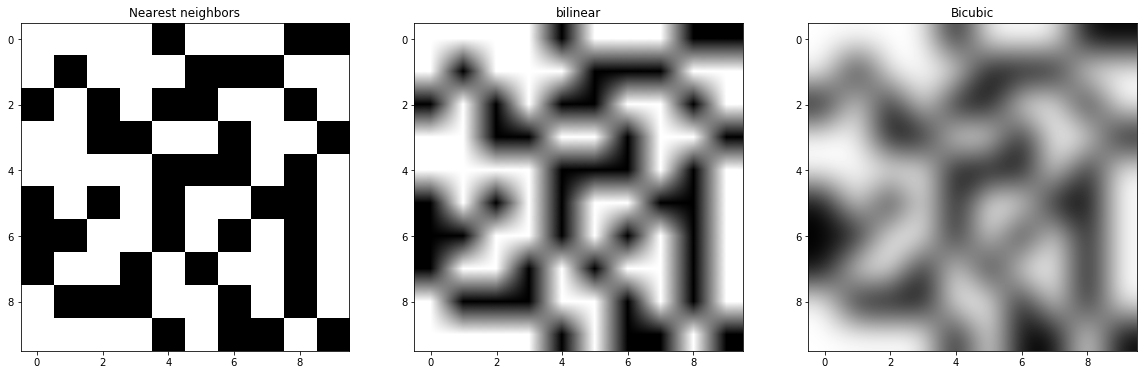

In [4]:
fig, ax = plt.subplots(figsize=(20, 20), ncols=3)

map1 = ax[0].imshow(df_2bit.astype(float), cmap='gray', interpolation='nearest')
ax[0].set_title('Nearest neighbors')

map2 = ax[1].imshow(df_2bit.astype(float),cmap='gray', interpolation='bilinear')
ax[1].set_title('bilinear')

map3 = ax[2].imshow(df_2bit.astype(float),cmap='gray', interpolation='bicubic')
ax[2].set_title('Bicubic');


**Here is an interactive example with a 10x10 pixels image and all the available interpolation methods:**

In [5]:
df_2bit_100px = pd.DataFrame(np.random.randint(0, 2, size=(10, 10)))

from ipywidgets import *

interpol_options = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

def draw_fig_at_size(s, interpol):
    fig = plt.figure(figsize=(s, s))
    fig.add_subplot(1, 1, 1)
    plt.title(f"10x10 pixels, at size : {s}")
    plt.imshow(df_2bit_100px, cmap="gray", interpolation=interpol)


interact(
    draw_fig_at_size,
    interpol = widgets.Dropdown(options=interpol_options, value=interpol_options[0], description='Interpolation'),
    s=IntSlider(min=2, max=10, step=1, value=5, continuous_update=True),
);

interactive(children=(IntSlider(value=5, description='s', max=10, min=2), Dropdown(description='Interpolation'…

### DPI

**DPI** stand for **Dots Per Inch**. It represents the *number of pixels printed per inch on a paper medium*. **DPI has no meaning outside of printing**.

**DPI is inherently related to the medium supporting the image**: a computer screen has a certain number of physical pixels that cannot change. If you count the number of pixels of this screen along one inch, you are measuring its DPI. 

> *TIP : Since this is the only value it can take, there is no point of using it if you never plan to print the image, because changing this value on Photoshop for example (without changing the pixel dimension !) will not change the image size on the screen.*

Media like paper do not have inherent DPI limitations like computer screens, and the user can decide at which DPI he wants to print an image. 

Another way of putting it is that **DPI is the resolution at which a digital image will be printed** on a specific medium.

#### [Optional] What it means in Python terms :

*From [Stack Overflow post by user ImportanceOfBeingErnest](https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size#47639545)* :

**Figure size** (`figsize`) determines the size of the figure in inches. This gives the amount of space the axes (and other elements) have inside the figure. The default figure size is (6.4, 4.8) inches in matplotlib 2. A larger figure size will allow for longer texts, more axes or more ticklabels to be shown.

Dots per inches (dpi) determines how many pixels the figure comprises. **The default dpi in matplotlib is 100**. A figure of figsize=(w,h) will have

```python
px, py = w*dpi, h*dpi  # pixels
# e.g.
# 6.4 inches * 100 dpi = 640 pixels
```

So in order to obtain a figure with a pixel size of e.g. (1200,600) you may chose several combinations of figure size and dpi, e.g.

```python
figsize=(15,7.5), dpi= 80
figsize=(12,6)  , dpi=100
figsize=( 8,4)  , dpi=150
figsize=( 6,3)  , dpi=200
```

#### Illustration : a figure's size when set to be printed on a 100 dpi paper

- The **image data** is 256x256 pixels
- The **image** is drawn on a **canvas** of 500x500 pixels
- The **figure**'s size is then **scaled** using `figsize=(4,4)` to make sure you have **100** pixels per inch on the paper **when printed at 100 DPI**
- The **figure**'s **resolution** is 100 DPI.

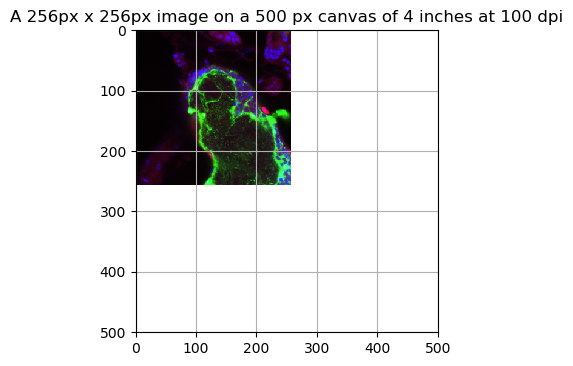

In [6]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

ax.imshow(big_image[20,:,:,:])
ax.set_xlim(0,500)
ax.set_ylim(500,0)
ax.grid()
ax.set_title('A 256px x 256px image on a 500 px canvas of 4 inches at 100 dpi');

#### Illustration : the same figure's size when set to be printed on a 200 dpi paper.

- The **image data** is 256x256 pixels
- The **image** is drawn on a **canvas** of 500x500 pixels
- The **figure**'s size is then **scaled** using `figsize=(2,2)` to make sure you have **200** pixels per inch on the paper **when printed at 200 DPI**
- The **figure**'s **resolution** is 200 DPI.

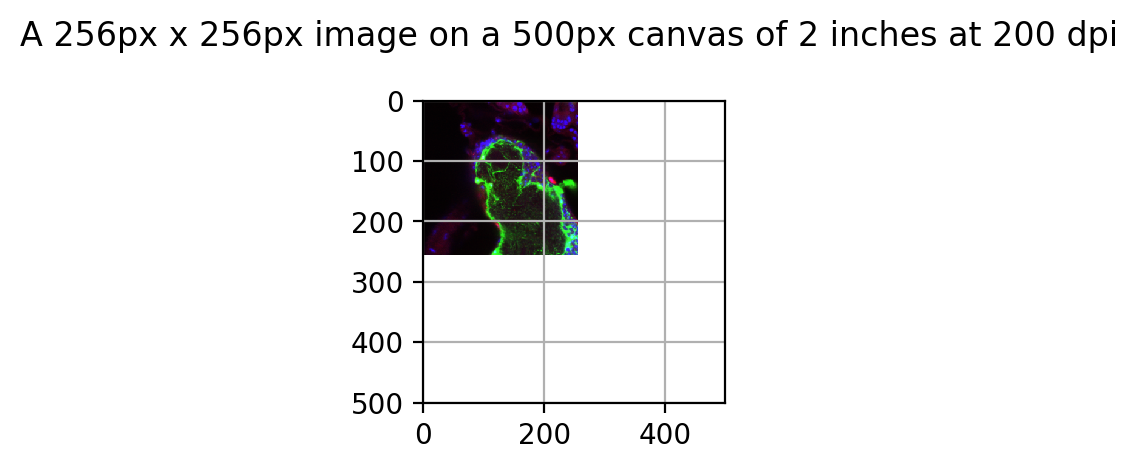

In [7]:
fig2, ax2 = plt.subplots(figsize=(2, 2), dpi=200)

big_image_slice = big_image[20,:,:,:]

#from skimage.transform import rescale, resize, downscale_local_mean
#image_resized = resize(big_image_slice, [500,500,3], anti_aliasing=False)

ax2.imshow(big_image[20,:,:,:])
ax2.set_xlim(0,500)
ax2.set_ylim(500,0)
ax2.grid()
ax2.set_title('A 256px x 256px image on a 500px canvas of 2 inches at 200 dpi \n');

**Notice the change in the font and grid sizes that automatically adapts itself to the DPI value while the figure size stays the same**

####  Simulation of several printing situations

Both a 50 DPI and a 150 DPI picture will appear as having the same physical size when printed respectively on 50 DPI and 150 DPI canvas. 

On the contrary, printing an image scaled for 50 DPI on a 150 DPI canvas will have it appear 3 times smaller.

**Here is how this would look like on paper :**

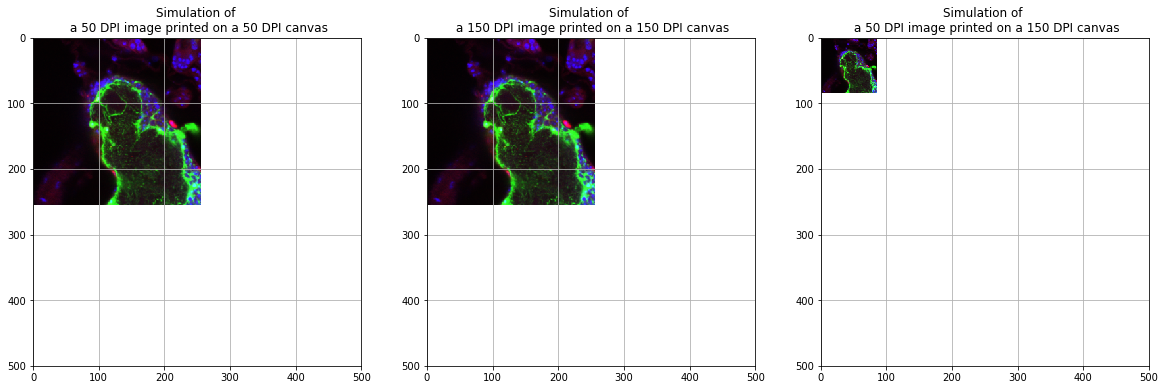

In [8]:
fig, ax = plt.subplots(figsize=(20, 20), ncols=3)

ax[0].imshow(big_image[20,:,:,:])
ax[0].set_xlim(0,500)
ax[0].set_ylim(500,0)
ax[0].grid()
ax[0].set_title('Simulation of \n a 50 DPI image printed on a 50 DPI canvas')

ax[1].imshow(big_image[20,:,:,:])
ax[1].set_xlim(0,500)
ax[1].set_ylim(500,0)
ax[1].grid()
ax[1].set_title('Simulation of \n a 150 DPI image printed on a 150 DPI canvas')


from skimage.transform import resize
image_resized = resize(big_image[20,:,:,:], [256//3,256//3,3], anti_aliasing=False)

ax[2].imshow(image_resized)
ax[2].set_xlim(0,500)
ax[2].set_ylim(500,0)
ax[2].grid()
ax[2].set_title('Simulation of \n a 50 DPI image printed on a 150 DPI canvas');

**And now interactively :**

- You can decide what size (`image_size`) **in pixels** your image starts with. 
- Then you define what size **in inches** (`image_inches`) you want your image to be. 
- Finally you can set up the **medium's (=canvas) DPI** your image will be printed on (`canvas_dpi`)

In [9]:
from skimage.transform import resize


def draw_fig_at_dpi(image_size=300, canvas_dpi=100, image_inches=3):

    # define the canvas size
    fig_size_dpi = round(500 / canvas_dpi, ndigits=2)

    # define the image's actual size
    original_size = 300
    original_canvas = 100
    original_inches = 3

    original_factor = original_size * original_inches / original_canvas
    new_factor = image_size * image_inches / canvas_dpi

    ratio = new_factor / original_factor

    image_new_size = round(original_size * ratio)
    image_resized = resize(
        big_image[20, :, :, :], [image_new_size, image_new_size, 3], anti_aliasing=True
    )

    # Draw the figure
    fig, ax = plt.subplots(
        figsize=(fig_size_dpi, fig_size_dpi), ncols=1, dpi=canvas_dpi
    )
    ax.imshow(image_resized)
    ax.set_xlim(0, 500)
    ax.set_ylim(500, 0)
    ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_visible(False)

    print(
        f'An image with a size of {image_size}px. The image is resized to be printed at {image_inches} inches on a canvas of 100 DPI. It is then "printed" on a canvas of {canvas_dpi} DPI:'
    )


# Convenience function to center the figure
from IPython.display import display, HTML

display(
    HTML(
        """
<style>
.output {
    display: flex;
    align-items: left;
    text-align: center;
}
</style>
"""
    )
)

interact(
    draw_fig_at_dpi,
    image_size=IntSlider(min=50, max=500, step=10, value=256, continuous_update=False),
    image_inches=IntSlider(min=1, max=10, step=1, value=3, continuous_update=False),
    canvas_dpi=IntSlider(min=50, max=300, step=50, value=150, continuous_update=False),
);

interactive(children=(IntSlider(value=256, continuous_update=False, description='image_size', max=500, min=50,…

## Colors in a mono channel digital image and LUTs

If you consider a single channel 12-bit digital image, a single number per pixel represents the intensity of the signal. Without additional information, **there is no specific color tied to the pixel values in the data itself**.

You can represent these values using gray levels, which is often the default in life science. But **you can also use a LUT (lookup table) or Colormap** to assign a specific color to each value and **create an artificial color representation of your data**.

Some colormaps are **gradients** from dark (low intensities) to light (high intensities), but there is also specialized colormaps than can **highlight** a change in intensity or texture, **split your data into several classes**, or **mimic reality** with a colorized version of a black and white image like a satellite image of an island.

**Here is the exact same image, but represented using different colormaps:**

- gray : *default*
- jet : *highlight high intensities*
- Set1 : *divide image into classes*
- flag : *highlight areas with high or low variabilities (texture)*
- terrain : *mimics a satellite view of land*

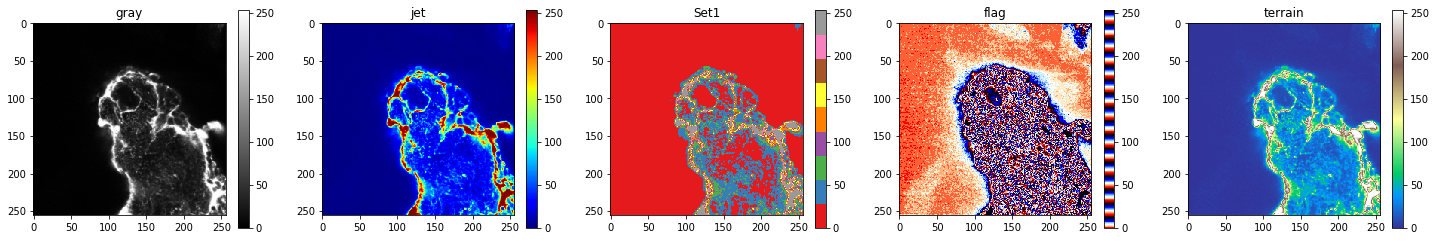

In [10]:
fig, ax = plt.subplots(figsize=(25, 4), ncols=5)

img = big_image[20,:,:,1]

map1 = ax[0].imshow(img.astype(float), cmap='gray')
ax[0].set_title('gray')
plt.colorbar(map1, ax=ax[0])

map2 = ax[1].imshow(img.astype(float),cmap='jet')
ax[1].set_title('jet')
fig.colorbar(map2,ax=ax[1])

map3 = ax[2].imshow(img.astype(float),cmap='Set1')
ax[2].set_title('Set1')
fig.colorbar(map3, ax=ax[2])

map4 = ax[3].imshow(img.astype(float),cmap='flag')
ax[3].set_title('flag')
fig.colorbar(map4, ax=ax[3])

map5 = ax[4].imshow(img.astype(float),cmap='terrain')
ax[4].set_title('terrain')
fig.colorbar(map5, ax=ax[4]);

## Bit Depth

The pixels have coordinates but also values. In the simple case of a grayscale image, each pixel has only one value.

> *This value is often the intensity of the signal in the case of a fluorescence image.*

The range of these values is depending on the bit depth chosen by the user or decided by the device used to produce the image.

> *For example, a pixel of an 8-bit image has 2^8 or 256 possible values, ranging from 0 to 255.*

**Here are several images with different bitdepth**

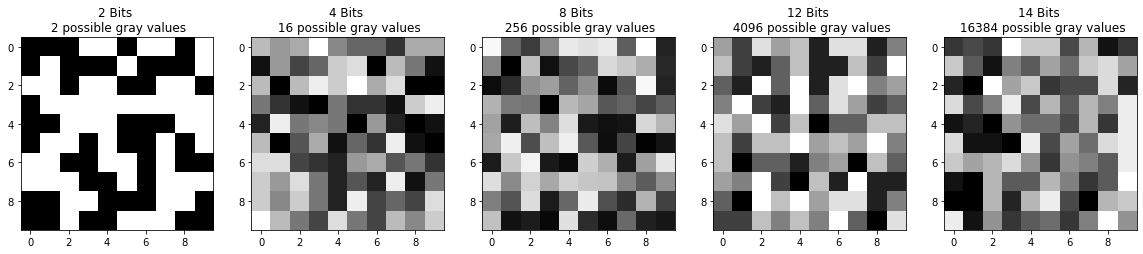

In [68]:
df_2bit = pd.DataFrame(np.random.randint(0,2,size=(10, 10)))
df_4bit = pd.DataFrame(np.random.randint(0,16,size=(10, 10)))
df_8bit = pd.DataFrame(np.random.randint(0,255,size=(10, 10)))
df_12bit = pd.DataFrame(np.random.randint(0,2^12-1,size=(10, 10)))
df_14bit = pd.DataFrame(np.random.randint(0,2^14-1,size=(10, 10)))

fig = plt.figure(figsize=(20,20))

fig.add_subplot(1,5,1)
plt.title('2 Bits \n 2 possible gray values')
plt.imshow(df_2bit, cmap='gray')

fig.add_subplot(1,5,2)
plt.title('4 Bits \n 16 possible gray values')
plt.imshow(df_4bit,cmap='gray')

fig.add_subplot(1,5,3)
plt.title('8 Bits \n 256 possible gray values')
plt.imshow(df_8bit,cmap='gray')

fig.add_subplot(1,5,4)
plt.title('12 Bits \n 4096 possible gray values')
plt.imshow(df_12bit,cmap='gray')

fig.add_subplot(1,5,5)
plt.title('14 Bits \n 16384 possible gray values')
plt.imshow(df_14bit,cmap='gray');

----
**Here is an interactive example on bit depth**

Notice the loss of information when decreasing from 16 bits to 1 bit. Use the menu to view the images with a different color palette.

> Unless you are using some very special display, you will not notice any differences between 12 and 16 bits. Generally computer monitors are able to display between 8 to 12 bits of color, but the human eye can barely notice any difference past 900 levels (around 10 bit) in optimal conditions anyways.<sup>1</sup>

In [88]:
from skimage import exposure
from skimage.util import img_as_uint

df_16bit = np.random.randint(0,2**16-1,size=(10, 10))
df_16bit.sort(axis=1)

real_image = io.imread('./images/m51.tif')

cmap_options = ['gray', 'viridis', 'jet', 'hot', 'coolwarm', 'seismic',
           'terrain', 'bone', 'twilight', 'ocean', 'RdBu', 'nipy_spectral']

def draw_fig_at_bit(c_map, bit):
    df_bit = exposure.rescale_intensity(df_16bit, out_range=(0, 2**bit - 1))
    real_image_bit = exposure.rescale_intensity(real_image, out_range=(0, 2**bit - 1))
    fig = plt.figure(figsize=(15,10))
    fig.add_subplot(1,2,1)
    plt.title(f'{bit} Bit(s) \n {2**bit} possible gray values')
    plt.imshow(df_bit, cmap=c_map,vmin=0, vmax=2**bit-1)
    
    fig.add_subplot(1,2,2)
    plt.title(f'{bit} Bit(s) \n {2**bit} possible gray values')
    plt.imshow(real_image_bit, cmap=c_map,vmin=0, vmax=2**bit-1)

interact(
    draw_fig_at_bit,
    bit = widgets.SelectionSlider(
    options=[1,2,4,8,12,16],
    value=8,
    description='Bit depth: ',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True
),
    c_map = widgets.Dropdown(options=cmap_options, value=cmap_options[11], description='Color Map'));

Notice the loss of information when decreasing from 16 bits to 1 bit. Use the menu to view with a different color palette.


interactive(children=(Dropdown(description='Color Map', index=11, options=('gray', 'viridis', 'jet', 'hot', 'c…

<sup>1</sup> Kimpe, T., & Tuytschaever, T. (2007). *Increasing the number of gray shades in medical display systems--how much is enough?*. Journal of digital imaging, 20(4), 422–432. https://doi.org/10.1007/s10278-006-1052-3